# **Diseño de Mapas estáticos con Python**

Los mapas son fundamentales para representar datos geoespaciales de manera clara y efectiva. En este artículo, exploraremos cómo generar mapas estáticos, agregando elementos esenciales como escalas, flechas de norte y leyendas. También veremos cómo incluir mapas base (tiles) y gráficos dentro de nuestras visualizaciones. Además de `Matplotlib`, exploraremos otras bibliotecas que permiten la creación de mapas estáticos.

## **1. Instalación de Librerías Necesarias**

Para trabajar con mapas estáticos en Python, utilizaremos las siguientes bibliotecas:

* **[geopandas](https://geopandas.org/en/stable/index.html)**: para manipulación y análisis de datos espaciales.
* **[matplotlib](https://matplotlib.org/)**: para graficar y personalizar mapas.
* **[rasterio](https://rasterio.readthedocs.io/en/stable/)**: para manejar datos ráster.
* **[contextily](https://contextily.readthedocs.io/en/latest/)**: para agregar mapas base a nuestros visuales.
* **[cartopy](https://scitools.org.uk/cartopy/docs/latest/)**: para proyecciones cartográficas y visualización avanzada

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import contextily as cx
import cartopy as cp

Comenzaremos realizando la lectura de las capas a visualizar:

In [2]:
URI = 'data/centro_historico.gpkg'
riesgo_sismico = gpd.read_file(URI, encoding='UTF-8')

Visualizar los atributos

In [3]:
riesgo_sismico.head(2)

,objectid,nomb_dep,nomb_pro,nomb_dist,vulnerab,peligro,riesgo,fecha_act,fuente,fuente_log,url,url_img,fecha_doc,operador,layer,path,codVul,geometry
0,1,Lima,Lima,Cercado de Lima,Media,Bajo,Medio,1.296518e+12,Municipalidad del RÃ­mac,MD Rimac,None,None,None,None,lima1,D:\Charlie\05_Articulos\MAPAS\2022\_Apoyo\lima...,3,"MULTIPOLYGON (((277619.664 8667551.251, 277619..."
1,2,Lima,Lima,Cercado de Lima,Media,Bajo,Medio,1.296518e+12,Municipalidad del RÃ­mac,MD Rimac,None,None,None,None,lima1,D:\Charlie\05_Articulos\MAPAS\2022\_Apoyo\lima...,3,"MULTIPOLYGON (((277632.648 8667432.551, 277632..."


## **2. Visualización básica con `plot`**

El método **[plot](https://geopandas.org/en/latest/docs/reference/api/geopandas.GeoDataFrame.plot.html)** de _GeoPandas_ es una herramienta para visualizar datos geoespaciales de forma rápida y sencilla. Se basa en _Matplotlib_ y permite representar geometrías almacenadas en un _GeoDataFrame_ sin necesidad de configuraciones complejas.

### **Parámetros principales**

Algunos de los parámetros más importantes para diseñar mapas con plot:

* `column`: Define la columna del GeoDataFrame que se usará para colorear los elementos.
* `cmap`: Permite seleccionar una escala de colores cuando se usa column.
* `color`: Define el color uniforme de todas las geometrías.
* `edgecolor`: Establece el color de los bordes de las geometrías.
* `linewidth`: Controla el grosor del borde de las geometrías.
* `legend`: Activa la leyenda cuando se usa column para clasificación.
* `markersize`: Se usa para definir el tamaño de los puntos en capas de puntos.
* `alpha`: Controla la transparencia de las geometrías (0 = totalmente transparente, 1 = opaco).
* `figsize`: Define el tamaño del gráfico en pulgadas.
* `categorical`: Especifica si los valores en column deben tratarse como categorías en lugar de valores continuos.
* `legend_kwds`: Permite personalizar la leyenda.
* `vmin` y `vmax`: Controlan los valores mínimo y máximo para la escala de colores.

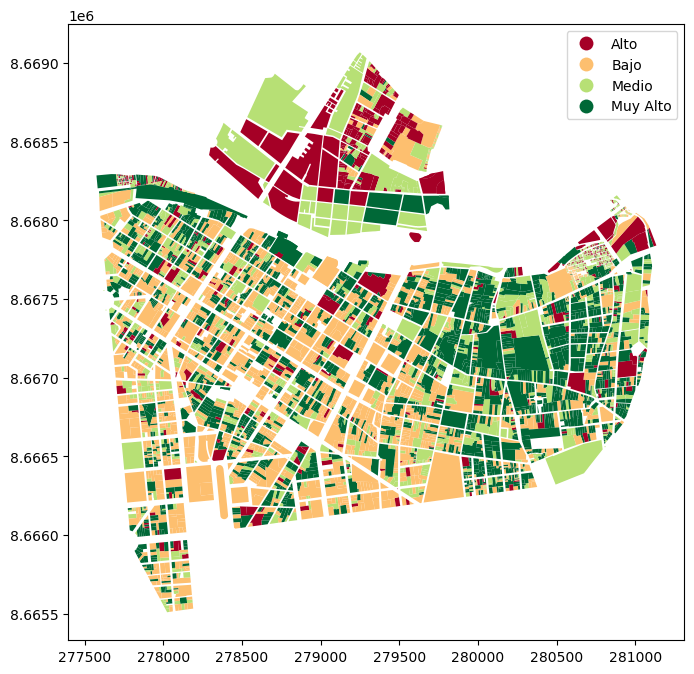

In [7]:
riesgo_sismico.plot(
                column='riesgo',    # Atributo a representar
                cmap='RdYlGn',      # Escala de colores
                figsize=(8,8),      # Tamaño del gráfico
                legend=True        # Activar la leyenda
            );

### **Personalizar los colores**

El parametro "cmap"